**Артамонов Кирилл, Б01-007**

**Решение задачи 14 варианта №3**

Необходимо решить краевую задачу для одномерного уравнения теплопроводности
$\frac{d}{dx} \big[k(x)\frac{du}{dx}\big] - q(x)u = -f(x)$

В одиннадцати равноудаленных точках отрезка $[0,1]$ с относительной точностью $0,0001$.

**Задание №14:**
Краевые условия задачи:
$u(0) = 0$, $u(1) = 1$

Дополнительные условия в точке разрыва:

$u(x_0-0) = u(x_0+0)$
$k(x_0-0)u_x(x_0-0) = k(x_0+0)u_x(x_0+0$


$x < x_0=0,525; k(x) = x; q(x)=e^{-x}; f(x)=x^3$


$x > x_0=0,525; k(x) = x^2 + 1; q(x)=e^{-x}; f(x)=1$

Модельная задача: $x_0 = 0,525;$

$k(x) = k(x_0)$


$q(x) = q(x_0)$

$f(x) = f(x_0)$

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

Зададим нашу задачу

In [ ]:
eps = 1e-6
x_0 = 0.525

def k(x):
    if x < x_0:
        return x
    else:
        return x * x + 1


def q(x):
    return np.exp(-x)


def f(x):
    if x < x_0:
        return x * x * x
    else:
        return 1

Будем применять метод встречных прогонок:

In [ ]:
h = 1e-6
def twoSideRun(u_0, u_1):
    L = int(1 / h)

    
    l_a = int(np.floor(x_0 / h))
    l_b = l_a + 1

    x = np.zeros(L + 1)
    for l in range(0, L + 1):
        x[l] = l * h


    u = np.zeros(L + 1)
    # filling border conditions
    u[0] = u_0
    u[L] = u_1

    # coeffs
    a = np.zeros(L + 1)
    b = np.zeros(L + 1)
    c = np.zeros(L + 1)
    d = np.zeros(L + 1)
    alpha = np.zeros(L + 1)
    beta  = np.zeros(L + 1)

    for l in range(1, l_a):
        a[l] = k((l + 0.5) * h)
        b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
        c[l] = k((l - 0.5) * h)
        d[l] = -f(l * h) * h * h

    for l in range(l_b + 1, L):
        a[l] = k((l + 0.5) * h)
        b[l] = -( k((l + 0.5) * h) + k((l - 0.5) * h) + q(l * h) * h * h )
        c[l] = k((l - 0.5) * h)
        d[l] = -f(l * h) * h * h

    alpha[1] = -a[1] / b[1]
    beta[1]  = (d[1] - c[1] * u_0) / b[1]

    alpha[L - 1] = -c[L - 1] / b[L - 1]
    beta[L - 1]  = (d[L - 1] - c[L - 1] * u_1) / b[L - 1]

    for l in range(2, l_a):
        alpha[l] = -a[l] / (b[l] + c[l] * alpha[l - 1])
        beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] * alpha[l - 1])

    for l in range(L - 2, l_b, -1):
        alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
        beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])


    u[l_a] = (k(l_a * h) * beta[l_a - 1] + k(l_b * h) * beta[l_b + 1]) / (k(l_a * h) * (1 - alpha[l_a - 1]) + k(l_b * h) * (1 - alpha[l_b + 1]))
    u[l_b] = u[l_a].copy()

    u[l_a - 1] = alpha[l_a - 1] * u[l_a] + beta[l_a - 1]
    u[l_b + 1] = alpha[l_b + 1] * u[l_b] + beta[l_b + 1]


    for l in range(l_a - 1, 0, -1):
        u[l] = alpha[l] * u[l + 1] + beta[l]

    for l in range(l_b + 1, L):
        u[l] = alpha[l] * u[l - 1] + beta[l]


    return x, u

In [ ]:
    x, u = twoSideRun(0, 1)

Plot the results:

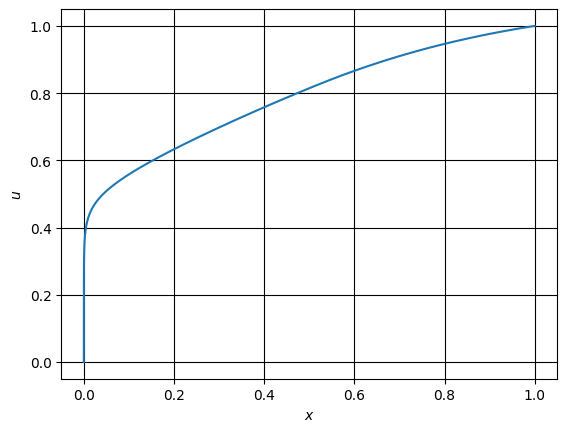

In [ ]:
plt.plot(x, u)
plt.grid(which='major', color='black', linestyle='-')

plt.xlabel(r'$x$')
plt.ylabel(r'$u$')

plt.xticks()
plt.yticks()

plt.show()